In [1]:
%load_ext autoreload
%autoreload
from simba import transfer_function_to_graph, tf2rss, adiabatically_eliminate
from sympy import symbols, simplify, Matrix, sqrt, conjugate

First looking at passive realisation of coupled cavity setup with coupling constant $g = 0$

In [2]:
s = symbols('s')
gamma_f, omega_s = symbols('gamma_f omega_s', real=True, positive=True)
tf = (s**2 + s * gamma_f + omega_s**2) / (s**2 - s * gamma_f + omega_s**2)

transfer_function_to_graph(tf, 'passive_coupled_cavity.png', layout='dot')

wrote passive_coupled_cavity.png


![](passive_coupled_cavity.png)

In [3]:
split_network = tf2rss(tf).to_slh().split()

In [4]:
h_int = split_network.interaction_hamiltonian
h_int.expr.simplify()

I*(-sqrt(gamma_1)*sqrt(gamma_f)*a_1*conjugate(a'_1) + sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1)*a'_1 + omega_s*a_1*conjugate(a_2) - omega_s*conjugate(a_1)*a_2)

In [5]:
split_network.interaction_hamiltonian.h

Matrix([
[0, 0, -I*omega_s,         0, I*sqrt(gamma_1)*sqrt(gamma_f),                              0, 0, 0],
[0, 0,          0, I*omega_s,                             0, -I*sqrt(gamma_1)*sqrt(gamma_f), 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0],
[0, 0,          0,         0,                             0,                              0, 0, 0]])

In [6]:
h_int.states

Matrix([
[            a_1],
[ conjugate(a_1)],
[            a_2],
[ conjugate(a_2)],
[           a'_1],
[conjugate(a'_1)],
[           a'_2],
[conjugate(a'_2)]])

In [7]:
simplify(h_int.dynamical_matrix)

Matrix([
[                           0,                            0, -omega_s,        0, sqrt(gamma_1)*sqrt(gamma_f),                           0, 0, 0],
[                           0,                            0,        0, -omega_s,                           0, sqrt(gamma_1)*sqrt(gamma_f), 0, 0],
[                     omega_s,                            0,        0,        0,                           0,                           0, 0, 0],
[                           0,                      omega_s,        0,        0,                           0,                           0, 0, 0],
[-sqrt(gamma_1)*sqrt(gamma_f),                            0,        0,        0,                           0,                           0, 0, 0],
[                           0, -sqrt(gamma_1)*sqrt(gamma_f),        0,        0,                           0,                           0, 0, 0],
[                           0,                            0,        0,        0,                           0,      

In [8]:
eqns = split_network.frequency_domain_eqns
eqns.eqns

Matrix([
[                                                                            sqrt(gamma_1)*sqrt(gamma_f)*a'_1 - omega_s*a_2 + s*a_1],
[                                           sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a'_1) - omega_s*conjugate(a_2) + s*conjugate(a_1)],
[                                                                                                               omega_s*a_1 + s*a_2],
[                                                                                         omega_s*conjugate(a_1) + s*conjugate(a_2)],
[                                            -sqrt(gamma_1)*sqrt(gamma_f)*a_1 + sqrt(2)*sqrt(gamma_1)*ain_1 - gamma_1*a'_1 + s*a'_1],
[-sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1) + sqrt(2)*sqrt(gamma_1)*conjugate(ain_1) - gamma_1*conjugate(a'_1) + s*conjugate(a'_1)],
[                                                                                                                            s*a'_2],
[                                                    

In [9]:
eqns.states.T

Matrix([[a_1, conjugate(a_1), a_2, conjugate(a_2), a'_1, conjugate(a'_1), a'_2, conjugate(a'_2), ain_1, conjugate(ain_1), aout_1, conjugate(aout_1), ain_2, conjugate(ain_2), aout_2, conjugate(aout_2)]])

In [10]:
# Calculating the input-output transfer function
ain1, aout1 = eqns.get_symbols(['ain_1', 'aout_1'])
aout1 = eqns.solve([ain1, conjugate(ain1)])[aout1]
tf = (aout1 / ain1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
adiabatically_eliminate(tf, gamma_1)

(gamma_f*s + omega_s**2 + s**2)/(gamma_f*s - omega_s**2 - s**2)

In [11]:
(aout1 / ain1).simplify()

(gamma_1*gamma_f*s + gamma_1*omega_s**2 + gamma_1*s**2 + omega_s**2*s + s**3)/(gamma_1*gamma_f*s - (gamma_1 - s)*(omega_s**2 + s**2))

In [12]:
(s**2 + s * gamma_f + omega_s**2) / (s**2 - s * gamma_f + omega_s**2)

(gamma_f*s + omega_s**2 + s**2)/(-gamma_f*s + omega_s**2 + s**2)

Now looking at the active realisation ($g \neq 0$)

In [13]:
# parameterise with lambda = g**2 - omega_s**2 > 0
lmbda = symbols('lambda', real=True, positive=True)
tf = (s**2 + s * gamma_f - lmbda) / (s**2 - s * gamma_f - lmbda)

transfer_function_to_graph(tf, 'active_coupled_cavity.png', layout='dot')

wrote active_coupled_cavity.png


![](active_coupled_cavity.png)

In [14]:
split_network = tf2rss(tf).to_slh().split()
h_int = split_network.interaction_hamiltonian
h_int.expr.simplify()

I*(-sqrt(gamma_1)*sqrt(gamma_f)*a_1*conjugate(a'_1) + sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1)*a'_1 - sqrt(lambda)*a_1*a_2 + sqrt(lambda)*conjugate(a_1)*conjugate(a_2))

In [15]:
simplify(h_int.dynamical_matrix)

Matrix([
[                           0,                            0,            0, sqrt(lambda), sqrt(gamma_1)*sqrt(gamma_f),                           0, 0, 0],
[                           0,                            0, sqrt(lambda),            0,                           0, sqrt(gamma_1)*sqrt(gamma_f), 0, 0],
[                           0,                 sqrt(lambda),            0,            0,                           0,                           0, 0, 0],
[                sqrt(lambda),                            0,            0,            0,                           0,                           0, 0, 0],
[-sqrt(gamma_1)*sqrt(gamma_f),                            0,            0,            0,                           0,                           0, 0, 0],
[                           0, -sqrt(gamma_1)*sqrt(gamma_f),            0,            0,                           0,                           0, 0, 0],
[                           0,                            0,       

In [16]:
eqns = split_network.frequency_domain_eqns
eqns.eqns

Matrix([
[                                                            sqrt(gamma_1)*sqrt(gamma_f)*a'_1 + sqrt(lambda)*conjugate(a_2) + s*a_1],
[                                                 sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a'_1) + sqrt(lambda)*a_2 + s*conjugate(a_1)],
[                                                                                               sqrt(lambda)*conjugate(a_1) + s*a_2],
[                                                                                               sqrt(lambda)*a_1 + s*conjugate(a_2)],
[                                            -sqrt(gamma_1)*sqrt(gamma_f)*a_1 + sqrt(2)*sqrt(gamma_1)*ain_1 - gamma_1*a'_1 + s*a'_1],
[-sqrt(gamma_1)*sqrt(gamma_f)*conjugate(a_1) + sqrt(2)*sqrt(gamma_1)*conjugate(ain_1) - gamma_1*conjugate(a'_1) + s*conjugate(a'_1)],
[                                                                                                                            s*a'_2],
[                                                    

In [17]:
# Calculating the input-output transfer function
ain1, aout1 = eqns.get_symbols(['ain_1', 'aout_1'])
aout1 = eqns.solve([ain1, conjugate(ain1)])[aout1]
tf = (aout1 / ain1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
adiabatically_eliminate(tf, gamma_1)

(-gamma_f*s + lambda - s**2)/(-gamma_f*s - lambda + s**2)

In [18]:
(s**2 + s * gamma_f - lmbda) / (s**2 - s * gamma_f - lmbda)

(gamma_f*s - lambda + s**2)/(-gamma_f*s - lambda + s**2)

Differs by phase shift of $\pi$

Now let's look at the transfer function from $a_1$ to $aout_1$

In [19]:
eqns.states.T

Matrix([[a_1, conjugate(a_1), a_2, conjugate(a_2), a'_1, conjugate(a'_1), a'_2, conjugate(a'_2), ain_1, conjugate(ain_1), aout_1, conjugate(aout_1), ain_2, conjugate(ain_2), aout_2, conjugate(aout_2)]])

In [20]:
a1, a1d, aout_1 = eqns.get_symbols(['a_1', 'conjugate(a_1)', 'aout_1'])
aout1 = eqns.solve([a1, a1d])[aout_1]
tf = (aout1 / a1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
tf
# tf = adiabatically_eliminate(tf, gamma_1)
# tf

sqrt(2)*(gamma_1*gamma_f*s - gamma_1*lambda + gamma_1*s**2 - lambda*s + s**3)/(2*gamma_1*sqrt(gamma_f)*s)

In [21]:
adiabatically_eliminate(tf.subs(lmbda, 0).simplify(), gamma_1).simplify()

sqrt(2)*(gamma_f + s)/(2*sqrt(gamma_f))

In [22]:
a1, a1d, ain_1 = eqns.get_symbols(['a_1', 'conjugate(a_1)', 'ain_1'])
ain1 = eqns.solve([a1, a1d])[ain_1]
tf = (a1 / ain1).simplify()
gamma_1, _ = split_network.aux_coupling_constants
tf = adiabatically_eliminate(tf, gamma_1)
tf

sqrt(2)*sqrt(gamma_f)*s/(gamma_f*s + lambda - s**2)

In [23]:
1 / (tf.subs(lmbda, 0).simplify())

sqrt(2)*(gamma_f - s)/(2*sqrt(gamma_f))

In [24]:
a2, a2d, aout_1 = eqns.get_symbols(['a_2', 'conjugate(a_2)', 'aout_1'])
aout1 = eqns.solve([a2, a2d])[aout_1]
tf = (aout1 / a2d).simplify()
gamma_1, _ = split_network.aux_coupling_constants
tf = adiabatically_eliminate(tf, gamma_1)
tf

(-sqrt(2)*gamma_f*s + sqrt(2)*lambda - sqrt(2)*s**2)/(2*sqrt(gamma_f)*sqrt(lambda))

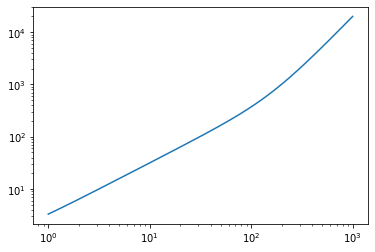

In [25]:
from sympy import I, pi, lambdify
params = {gamma_f: 1000, lmbda: 2000}
f = symbols('f')
replaced = tf.subs(params).subs(s, I*2*pi*f).simplify()
fn = lambdify(f, replaced, 'numpy')

import numpy as np
import matplotlib.pyplot as plt

fs = np.logspace(0, 3, num=1000)
ys = fn(fs)

fig, ax = plt.subplots()
ax.loglog(fs, abs(ys))
plt.show()

# WHY does it look inverted? Response should decrease at higher frequencies